In [1]:
import numpy as np
import matplotlib.pyplot as plt
from newenv import RLIAEnv
%matplotlib inline

In [2]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]

  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Cummulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

In [3]:
env = RLIAEnv()
#print a smaple action space
print(env.action_space.sample())

2


In [4]:
class EpsilonGreedyAgent(object):
    def __init__(self, max_iterations=200, epsilon=0.1):
        env = RLIAEnv()
        self.iterations = max_iterations
        self.epsilon = epsilon

    def act(self):
        q_values = np.zeros(3)
        arm_rewards = np.zeros(3)
        arm_counts = np.zeros(3)

        rewards = []
        cum_rewards = []
        env.reset()
        for i in range(1, self.iterations+1):
            arm = np.random.choice(env.action_space.sample()+1) if np.random.random() < self.epsilon else np.argmax(q_values)
            state, reward, done, _ = env.step(arm)
            print("THIS IS MYYYY REWARDDDDD", reward)
            if arm == np.argmax(q_values):
                print("EXPLOITTATION!")

            arm_rewards[arm] += reward
            arm_counts[arm] += 1
            q_values[arm] = arm_rewards[arm] / arm_counts[arm]  # update q_values

            rewards.append(reward)
            cum_rewards.append(sum(rewards)/len(rewards))
            print("ue location", env.ue_loc)
            print("arm", arm)
            print(reward)

        return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [5]:
egreedy_agent = EpsilonGreedyAgent(max_iterations=4000, epsilon=0.4)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

THIS IS MYYYY REWARDDDDD 8.629032365659993
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.629032365659993
EXPLOITTATION!
ue location [15, -6]
arm 1
8.629032365659993
THIS IS MYYYY REWARDDDDD 8.729032365659995
ue location [15, -6]
arm 0
8.729032365659995
THIS IS MYYYY REWARDDDDD 8.729032365659995
EXPLOITTATION!
ue location [15, -6]
arm 0
8.729032365659995


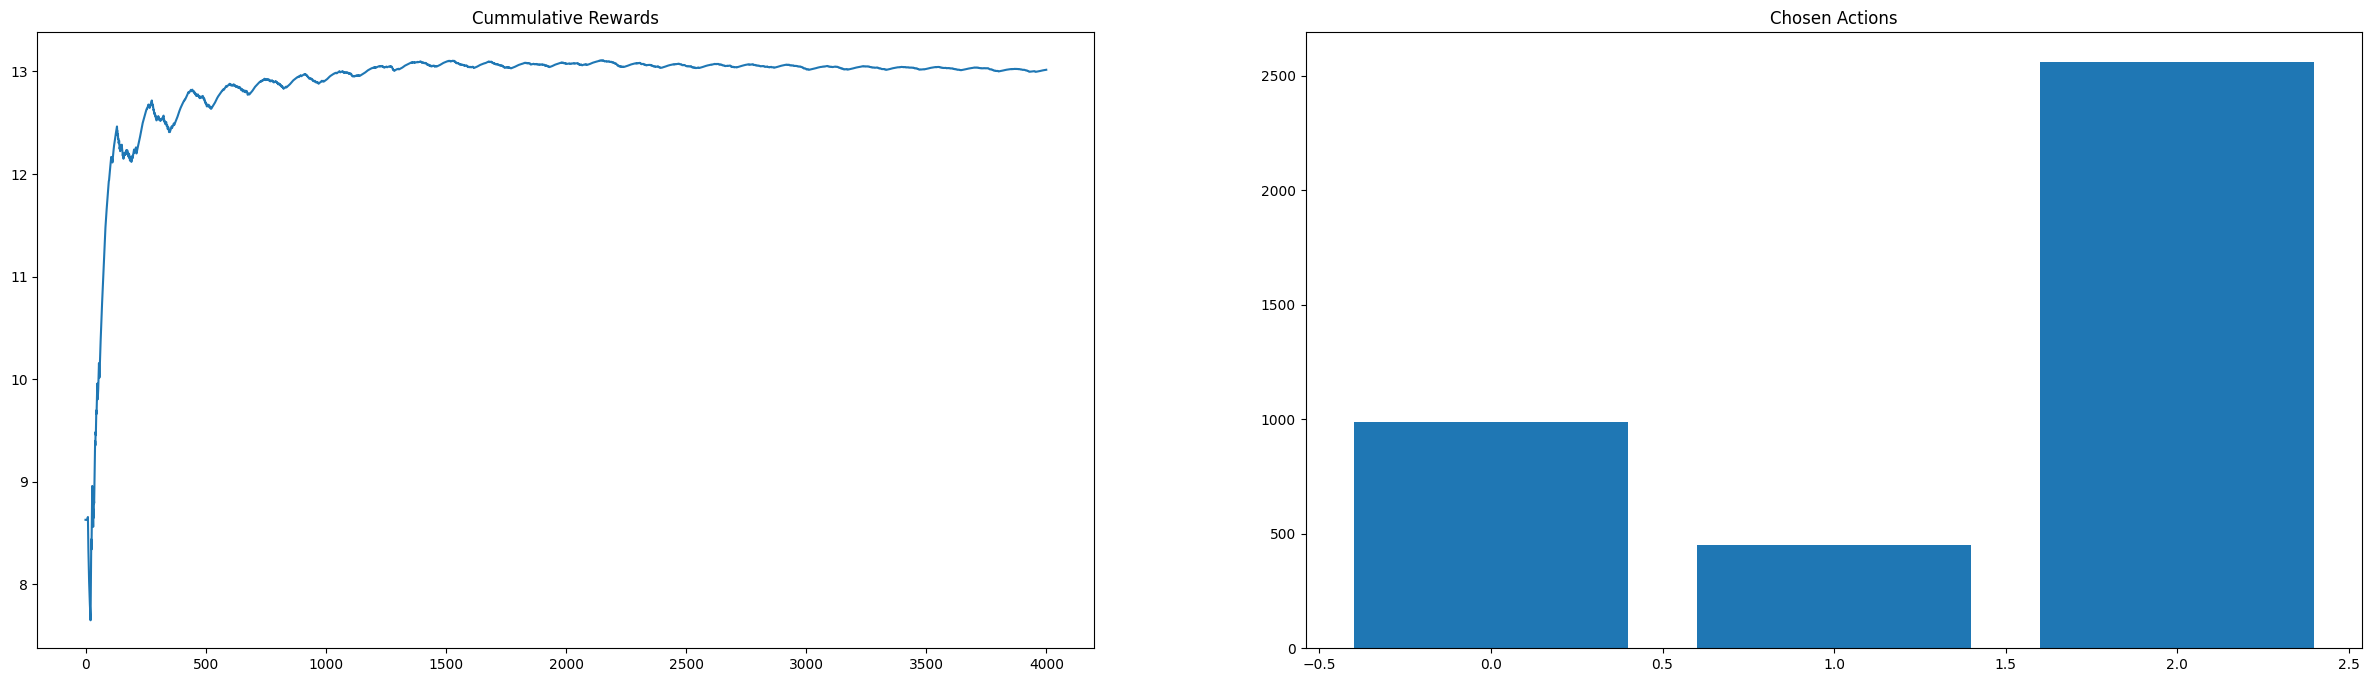

In [6]:
plot_history(eg_history)